In [10]:
# !pip install midiutil


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from midiutil import MIDIFile


In [12]:
anger_data = pd.read_csv('https://github.com/Colmeman/VolafoneSER/blob/main/Data/Call_log_anger.csv')


,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
0,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,anger
1,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
2,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,anger
3,14270,2017-01-01 00:00:00,2642,1027,12,Resolution3,Type20,Plan4,anger
4,26200,2017-01-01 00:00:00,1154,427,1,Resolution3,Type50,Plan5,anger
...,...,...,...,...,...,...,...,...,...
404950,14300,2019-06-30 00:00:00,874,340,27,Resolution1,Type50,Plan3,anger
404951,26310,2019-06-30 00:00:00,1242,459,19,Resolution1,Type20,Plan4,anger
404952,32260,2019-06-30 00:00:00,159,53,14,Resolution1,Type30,Plan4,anger
404953,32340,2019-06-30 00:00:00,423,164,10,Resolution2,Type20,Plan3,anger


In [2]:
anger_data = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_anger.csv')
anger_data

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
0,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,anger
1,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
2,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,anger
3,14270,2017-01-01 00:00:00,2642,1027,12,Resolution3,Type20,Plan4,anger
4,26200,2017-01-01 00:00:00,1154,427,1,Resolution3,Type50,Plan5,anger
...,...,...,...,...,...,...,...,...,...
404950,14300,2019-06-30 00:00:00,874,340,27,Resolution1,Type50,Plan3,anger
404951,26310,2019-06-30 00:00:00,1242,459,19,Resolution1,Type20,Plan4,anger
404952,32260,2019-06-30 00:00:00,159,53,14,Resolution1,Type30,Plan4,anger
404953,32340,2019-06-30 00:00:00,423,164,10,Resolution2,Type20,Plan3,anger


### AHT (Average Handle Time) metrics

In [38]:

def sonify_agent_data(anger_data):
    anger_data['Call_Date'] = pd.to_datetime(anger_data['Call_Date'], format='%Y-%m-%d %H:%M:%S')  # Adjust the format as needed

    while True:
        # Request Agent ID from the user
        agent_id = int(input("Enter Agent ID: "))
        
        # Check if the Agent ID exists in the data
        if agent_id not in anger_data['Agent_ID'].unique():
            print(f"Agent ID {agent_id} does not exist in the data. Please enter a valid Agent ID.")
            continue
        
        # Request Year from the user
        year = input("Enter Year(2017-2018): ")
        
        # Check if the Year is valid
        if year not in anger_data['Call_Date'].dt.year.astype(str).unique():
            print(f"Year {year} is not valid. Please enter a valid Year.")
            continue
        
        # Request Month from the user
        month = input("Enter Month (01-12): ")
        
        # Check if the Month is valid
        if month not in [str(i).zfill(2) for i in range(1, 13)]:
            print(f"Month {month} is not valid. Please enter a valid Month.")
            continue
        
        # Request Threshold from the user
        threshold = int(input("Enter Threshold Value (from 900(recomended) to 1800): "))
        
        # Check if the Threshold is valid
        if not (900 <= threshold <= 1800):
            print(f"Threshold {threshold} is not valid. Please enter a valid Threshold between 900 and 1800.")
            continue

        specific_month = year + '-' + month
        
        # Request Sonification Type from the user
        sonification_type = input("Enter Sonification Type (s for simple or v for varied pitch): ").strip().lower()
        
        if sonification_type not in ['s', 'v']:
            print("Sonification Type must be 's' for simple or 'v' for varied pitch. Please enter a valid Sonification Type.")
            continue
        
        data_agent = anger_data[anger_data['Agent_ID'] == agent_id].copy()

        # Convert 'Call_Date' to a datetime object
        data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

        # Extract the month and year from 'Call_Date'
        data_agent['Month'] = data_agent['Call_Date'].dt.strftime('%Y-%m')

        # Convert 'Talk_Time' to numeric in case it's not already
        data_agent['Talk_Time'] = pd.to_numeric(data_agent['Talk_Time'])

        # Filter the DataFrame for a specific month
        filtered_data = data_agent[data_agent['Month'] == specific_month]

        # Group by 'Call_Date' (day) and calculate the average talk time for each day
        average_talk_time_by_day = filtered_data.groupby('Call_Date')['Talk_Time'].mean()

        # Reset the index to have 'Call_Date' as a regular column
        average_talk_time_by_day = average_talk_time_by_day.reset_index()

        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the data
        ax.plot(average_talk_time_by_day['Call_Date'], average_talk_time_by_day['Talk_Time'], marker='o', linestyle='-')

        # Add a horizontal line for the threshold
        ax.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')

        # Set labels and title
        ax.set_xlabel('Date')
        ax.set_ylabel('Average Talk Time')
        ax.set_title('Average Talk Time per Day in Specific Month')

        # Rotate x-axis labels for better readability (optional)
        plt.xticks(rotation=45)

        # Show the legend
        ax.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()

        # Create a MIDI file
        midi_file = MIDIFile(1)  # One track

        # Define MIDI parameters
        track = 0
        channel = 0
        time = 0  # Initial time
        velocity = 100  # Adjust as needed
        duration = 1  # Adjust as needed
        max_value = average_talk_time_by_day['Talk_Time'].max()
        # Add notes to the MIDI file based on your data and sonification type
        for index, row in average_talk_time_by_day.iterrows():
            talk_time = row['Talk_Time']

            # Determine pitch and volume based on the sonification type
            if sonification_type == 's':
                if talk_time < threshold:
                    pitch = 60  # Lower pitch
                    volume = 64  # Lower volume
                else:
                    pitch = 72  # Higher pitch
                    volume = 127  # Higher volume
            elif sonification_type == 'v':
                
                # Define pitch variation based on the sonification type and threshold
                if talk_time < threshold:
                    # Map values below the threshold to pitch range within one octave
                    pitch_range = 6  # One octave
                    pitch = 48 + int((talk_time / threshold) * pitch_range)  # Adjust as needed
                else:
                    # Map values above the threshold to a wider pitch range
                    pitch_range = 24  # Two octaves
                    pitch = 72 + int(((talk_time - threshold) / (max_value - threshold)) * pitch_range)  # Adjust as needed
            
            # Add the note to the MIDI file
            midi_file.addNote(
                track,
                channel=channel,
                pitch=pitch,
                time=time,
                duration=duration,
                volume=100,
            )
            
            # Increment the time for the next note
            time += 1  # You can adjust the time increment as needed

        # Save the MIDI file to a specific path and filename
        output_path = 'c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/sonified_AHT_function.mid'

        with open(output_path, 'wb') as midi_output:
            midi_file.writeFile(midi_output)

        return f"Sonified data for Agent {agent_id} in {year}-{month} saved as {output_path}"

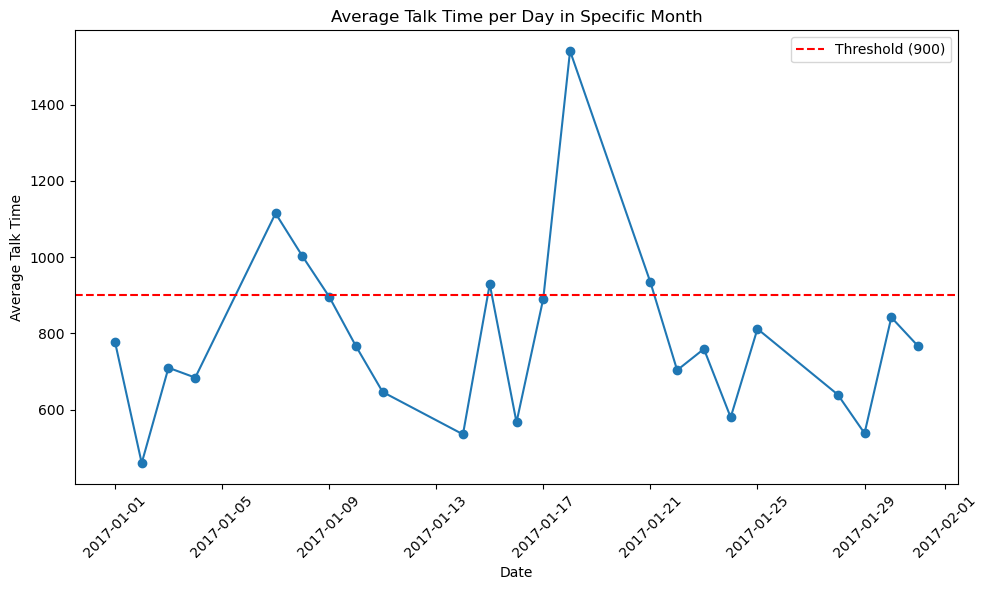

'Sonified data for Agent 32400 in 2017-01 saved as c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/sonified_AHT_function.mid'

In [39]:

sonify_agent_data(anger_data)

### FCR (First Call Resolution) Metric

Average of Resolution1 across the whole data, this could show us what could be the threshold

Every day in a month

In [16]:
target_year = 2017  # Replace with the year you want
target_month = 1    # Replace with the month you want

In [17]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the year and month from 'Call_Date'
data_agent['Year'] = data_agent['Call_Date'].dt.year
data_agent['Month'] = data_agent['Call_Date'].dt.month

filtered_data = data_agent[(data_agent['Year'] == target_year) & (data_agent['Month'] == target_month)]

# Calculate the total number of calls for each day in the specific month
total_calls_by_day = filtered_data.groupby(filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
total_calls_by_day.columns = ['Day', 'Total Calls']

# Calculate the number of calls with 'Resolution1' for each day in the specific month
resolution1_calls_by_day = filtered_data[filtered_data['Call_resolution_ID'] == 'Resolution1'].groupby(
    filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
resolution1_calls_by_day.columns = ['Day', 'Resolution1 Calls']

# Merge the two DataFrames on 'Day'
resolution_percentage_daily_in_a_month_data = pd.merge(total_calls_by_day, resolution1_calls_by_day, on='Day', how='left')

# Fill NaN values with 0 (in case there are days with no 'Resolution1' calls)
resolution_percentage_daily_in_a_month_data['Resolution1 Calls'] = resolution_percentage_daily_in_a_month_data['Resolution1 Calls'].fillna(0)

# Calculate the percentage of 'Resolution1' calls for each day in the specific month
resolution_percentage_daily_in_a_month_data['Resolution1 Percentage'] = (resolution_percentage_daily_in_a_month_data['Resolution1 Calls'] / resolution_percentage_daily_in_a_month_data['Total Calls']) * 100

# Display the result
resolution_percentage_daily_in_a_month_data


,Day,Total Calls,Resolution1 Calls,Resolution1 Percentage
0,1,4,4,100.000000
1,2,8,7,87.500000
2,3,4,4,100.000000
3,4,11,9,81.818182
4,7,6,3,50.000000
5,8,4,2,50.000000
6,9,10,7,70.000000
7,10,8,8,100.000000
8,11,6,4,66.666667
9,14,7,6,85.714286


In [ ]:
resolution_percentage_daily_in_a_month_data.to_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/agent-32400-jan-2017-FCR.csv', index=False)

Simple Sonification

In [44]:
# Define the MIDI parameters
midi_file = MIDIFile(1)  # One track
track = 0
time = 0  # Initial time

# Add a track name and tempo
midi_file.addTrackName(track, time, "Resolution Percentage Sonification")
midi_file.addTempo(track, time, 120)  # Adjust the tempo as needed

# Iterate through the DataFrame
for index, row in resolution_percentage_daily_in_a_month_data.iterrows():
    resolution_percentage = row['Resolution1 Percentage']
    threshold = 75  # Your specified threshold

    # Calculate pitch and volume based on the threshold
    if resolution_percentage >= threshold:
        # Lower pitch and lower volume for values above or equal to the threshold
        pitch = 60  # Adjust the pitch value as needed
        volume = 64  # Adjust the volume value as needed
    else:
        # High pitch and higher volume for values below the threshold
        pitch = 72  # Adjust the pitch value as needed
        volume = 96  # Adjust the volume value as needed

    # Add a note event with pitch and volume
    midi_file.addNote(
        track,
        0,  # Channel (0-15)
        pitch,  # Pitch
        time,  # Start time (in beats)
        1,  # Duration (in beats, adjust as needed)
        volume  # Volume
    )

    # Increment time
    time += 1  # You can adjust the time increment as needed

output_path = 'c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/sonified_FCR.mid'

with open(output_path, 'wb') as midi_output:
    midi_file.writeFile(midi_output)

With Pitch Variation

In [46]:
# Define the MIDI parameters
midi_file = MIDIFile(1)  # One track
track = 0
time = 0  # Initial time

# Add a track name and tempo
midi_file.addTrackName(track, time, "Resolution Percentage Sonification")
midi_file.addTempo(track, time, 120)  # Adjust the tempo as needed

# Pitch range for values below the threshold
min_pitch_below_threshold = 72  # Adjust the minimum pitch value
max_pitch_below_threshold = 96  # Adjust the maximum pitch value

# Pitch range for values above or equal to the threshold
min_pitch_above_threshold = 48  # Adjust the minimum pitch value
max_pitch_above_threshold = 60  # Adjust the maximum pitch value

# Iterate through the DataFrame
for index, row in resolution_percentage_daily_in_a_month_data.iterrows():
    resolution_percentage = row['Resolution1 Percentage']
    threshold = 75  # Your specified threshold

    # Calculate pitch based on the threshold and pitch range
    if resolution_percentage >= threshold:
        # Calculate pitch within the smaller range
        pitch = min_pitch_above_threshold + (max_pitch_above_threshold - min_pitch_above_threshold) * (resolution_percentage - threshold) / (100 - threshold)
        volume = 64  # Adjust the volume value as needed
    else:
        # Calculate pitch within the larger range
        pitch = min_pitch_below_threshold + (max_pitch_below_threshold - min_pitch_below_threshold) * resolution_percentage / threshold
        volume = 96  # Adjust the volume value as needed

    # Add a note event with pitch and volume
    midi_file.addNote(
        track,
        0,  # Channel (0-15)
        int(pitch),  # Pitch (convert to integer)
        time,  # Start time (in beats)
        1,  # Duration (in beats, adjust as needed)
        volume  # Volume
    )

    # Increment time
    time += 1  # You can adjust the time increment as needed

output_path = 'c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/sonified_FCR_variedpitch.mid'

with open(output_path, 'wb') as midi_output:
    midi_file.writeFile(midi_output)
